In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as numpy
import cv2
import random
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Crack detection/dataset.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Crack detection")

0 For positive and 1 For negative

In [ ]:
DATA=[]
for i,label in enumerate(['/content/drive/MyDrive/Crack detection/Positive','/content/drive/MyDrive/Crack detection/Negative']):
    for image in os.listdir(label)[:8000]:
            path=label+'/'+image
            image=cv2.imread(path)
            image=cv2.resize(image,(32,32))
            DATA.append((image,i))
DATA=np.array(DATA)
random.shuffle(DATA)

In [ ]:
DATA[:,1]

array([0, 0, 0, ..., 1, 1, 1], dtype=object)

In [ ]:
Images=DATA[:,0]
Labels=DATA[:,1]
IMAGES=np.array([image for image in Images])
IMAGES.shape

(16000, 32, 32, 3)

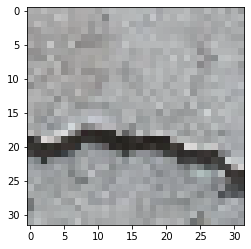

In [ ]:
plt.imshow(IMAGES[0])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(IMAGES,Labels,test_size=0.2)

In [ ]:
pd.Series(y_train).value_counts()

0    10853
1     1947
dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

0    2668
1     532
dtype: int64

In [ ]:
Rescaled_x_train=x_train/255.0
Rescaled__x_test=x_test/255.0

In [ ]:
type(Rescaled_x_train)

numpy.ndarray

In [ ]:
X = np.asarray(Rescaled_x_train).astype(np.float32)
x_test= np.asarray(Rescaled__x_test).astype(np.float32)
Y=np.asarray(y_train).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

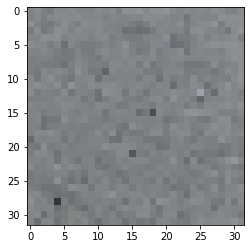

In [ ]:
plt.imshow(Rescaled_x_train[0])

#Second Dataset

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/Crack detection/crack_Dataset_2')

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/SDNET2018.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Crack detection/crack_Dataset_2")

In [ ]:
def GET_Double_step_data(path_1,path_2):
  DATA_2=[]
  for i,label in enumerate([path_1,path_2]):
    for image in os.listdir(label)[:2000]:
      path=label+'/'+image
      image=cv2.imread(path)
      image=cv2.resize(image,(32,32))
      DATA_2.append((image,i))
  return np.array(DATA_2)

In [ ]:
from sklearn.utils import shuffle
D_data=GET_Double_step_data('/content/drive/MyDrive/Crack detection/crack_Dataset_2/D/CD','/content/drive/MyDrive/Crack detection/crack_Dataset_2/D/UD')
D_data=shuffle(D_data)
P_data=GET_Double_step_data('/content/drive/MyDrive/Crack detection/crack_Dataset_2/P/CP','/content/drive/MyDrive/Crack detection/crack_Dataset_2/P/UP')
P_data=shuffle(P_data)
W_data=GET_Double_step_data('/content/drive/MyDrive/Crack detection/crack_Dataset_2/W/CW','/content/drive/MyDrive/Crack detection/crack_Dataset_2/W/UW')
W_data=shuffle(W_data)


In [ ]:
D_data_images=D_data[:,0]
D_data_labels=D_data[:,1]
P_data_images=P_data[:,0]
P_data_labels=P_data[:,1]
W_data_images=W_data[:,0]
W_data_labels=W_data[:,1]
D_data_images=np.array([image for image in D_data_images])
P_data_images=np.array([image for image in P_data_images])
W_data_images=np.array([image for image in W_data_images])
D_data_images.shape,P_data_images.shape,W_data_images.shape

((4000, 32, 32, 3), (4000, 32, 32, 3), (4000, 32, 32, 3))

In [ ]:
d=pd.DataFrame({'images':list(D_data_images)})
p=pd.DataFrame({'images':list(P_data_images)})
w=pd.DataFrame({'images':list(W_data_images)})
d_label=pd.DataFrame({'LABELS':list(D_data_labels)})
p_label=pd.DataFrame({'LABELS':list(P_data_labels)})
w_label=pd.DataFrame({'LABELS':list(W_data_labels)})

In [ ]:
ALL_IMAGES=pd.concat([d,p,w])
ALL_LABELS=pd.concat([d_label,p_label,w_label])

In [ ]:
ALL_IMAGES=np.array([ i for i in ALL_IMAGES['images'].values])

In [ ]:
ALL_LABELS=np.array(ALL_LABELS)
ALL_LABELS.shape

(12000, 1)

In [ ]:
ALL_LABELS

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

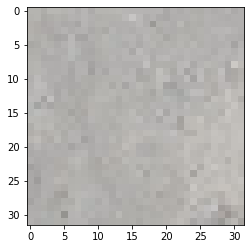

In [ ]:
plt.imshow(ALL_IMAGES[35])

In [ ]:
ALL_LABELS[35]

array([1])

In [ ]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(ALL_IMAGES,ALL_LABELS,test_size=0.2)

In [ ]:
scaled_x_train_2=x_train_2/255.0
scaled_x_test_2=x_test_2/255.0

In [ ]:
y_train_2=np.asarray(y_train_2).astype(np.float32)
y_test_2=np.asarray(y_test_2).astype(np.float32)

In [ ]:
y_train_2.shape,y_test_2.shape

((9600, 1), (2400, 1))

## First step (in Double step transfer learning)

In [ ]:
resnet50_model=keras.applications.resnet.ResNet50(include_top=False, 
                                                  weights='imagenet',
                                                  input_shape=(32,32,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet50_model.layers:
  layer.trainable=False

In [ ]:
flat=keras.layers.Flatten()(resnet50_model.output)
Hidden_1=keras.layers.Dense(100,activation='relu')(flat)
output=keras.layers.Dense(1,activation='sigmoid')(Hidden_1)
ResNet_50_Model=keras.models.Model([resnet50_model.input],[output])

In [ ]:
ResNet_50_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['Accuracy'])
hist=ResNet_50_Model.fit(scaled_x_train_2,y_train_2,epochs=20)

Epoch 1/20
300/300 [==============================] - 46s 138ms/step - loss: 0.7408 - Accuracy: 0.5010
Epoch 2/20
300/300 [==============================] - 44s 148ms/step - loss: 0.7116 - Accuracy: 0.5196
Epoch 3/20
300/300 [==============================] - 41s 137ms/step - loss: 0.6978 - Accuracy: 0.5251
Epoch 4/20
300/300 [==============================] - 44s 145ms/step - loss: 0.7092 - Accuracy: 0.5232
Epoch 5/20
300/300 [==============================] - 46s 153ms/step - loss: 0.7069 - Accuracy: 0.5209
Epoch 6/20
300/300 [==============================] - 42s 140ms/step - loss: 0.6951 - Accuracy: 0.5217
Epoch 7/20
300/300 [==============================] - 42s 141ms/step - loss: 0.6942 - Accuracy: 0.5267
Epoch 8/20
300/300 [==============================] - 51s 171ms/step - loss: 0.6922 - Accuracy: 0.5230
Epoch 9/20
300/300 [==============================] - 56s 186ms/step - loss: 0.6895 - Accuracy: 0.5336
Epoch 10/20
300/300 [==============================] - 41s 138ms/step - l

In [ ]:
ResNet_50_Model.evaluate(x_test_2,y_test_2)

75/75 [==============================] - 11s 137ms/step - loss: 0.9721 - Accuracy: 0.5104


[0.9721318483352661, 0.5104166865348816]

## Second Step (in Double step transfer learning)

In [ ]:
for layer in ResNet_50_Model.layers:
  layer.trainable=False
Hidden_1_second=keras.layers.Conv2D(16,(3,3),padding='same',activation='relu',name='double_step_features')(ResNet_50_Model.get_layer('conv5_block3_out').output)
flat_second=keras.layers.Flatten()(Hidden_1_second)
hidden_2_second=keras.layers.Dense(200,activation='relu')(flat_second)
output_second=keras.layers.Dense(1,activation='sigmoid')(hidden_2_second)
Second_Step_Model=keras.models.Model([ResNet_50_Model.input],[output_second])

In [ ]:
Second_Step_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['Accuracy'])
hist_2=Second_Step_Model.fit(X,Y,epochs=20)

Epoch 1/20
400/400 [==============================] - 61s 145ms/step - loss: 0.2340 - Accuracy: 0.9047
Epoch 2/20
400/400 [==============================] - 60s 149ms/step - loss: 0.1009 - Accuracy: 0.9596
Epoch 3/20
400/400 [==============================] - 60s 149ms/step - loss: 0.0992 - Accuracy: 0.9591
Epoch 4/20
400/400 [==============================] - 57s 143ms/step - loss: 0.0848 - Accuracy: 0.9669
Epoch 5/20
400/400 [==============================] - 58s 145ms/step - loss: 0.0900 - Accuracy: 0.9651
Epoch 6/20
400/400 [==============================] - 57s 143ms/step - loss: 0.0851 - Accuracy: 0.9656
Epoch 7/20
400/400 [==============================] - 59s 149ms/step - loss: 0.0773 - Accuracy: 0.9689
Epoch 8/20
400/400 [==============================] - 58s 145ms/step - loss: 0.0797 - Accuracy: 0.9701
Epoch 9/20
400/400 [==============================] - 57s 141ms/step - loss: 0.0769 - Accuracy: 0.9705
Epoch 10/20
400/400 [==============================] - 57s 143ms/step - l

In [ ]:
Second_Step_Model.evaluate(x_test,y_test)

100/100 [==============================] - 17s 160ms/step - loss: 0.0587 - Accuracy: 0.9784


[0.0586642250418663, 0.9784374833106995]

Fusion

In [ ]:
ResNet_50_Model.get_layer('conv5_block3_out')

In [ ]:
Second_Step_Model.get_layer('conv5_block3_out')

In [ ]:
ADD=keras.layers.add([ResNet_50_Model.get_layer('conv5_block3_out').output,Second_Step_Model.get_layer('conv5_block3_out').output])
flat=keras.layers.Flatten()(ADD)
output_=keras.layers.Dense(1,activation='sigmoid')(flat)
ELM=keras.models.Model([resnet50_model.input],[output_])

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(ELM)

In [ ]:
ELM.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['Accuracy'])
hist_2=ELM.fit(X,Y,epochs=50)

Epoch 1/50
400/400 [==============================] - 91s 199ms/step - loss: 0.4024 - Accuracy: 0.8407
Epoch 2/50
400/400 [==============================] - 72s 180ms/step - loss: 0.1953 - Accuracy: 0.9207
Epoch 3/50
400/400 [==============================] - 65s 162ms/step - loss: 0.1512 - Accuracy: 0.9512
Epoch 4/50
400/400 [==============================] - 66s 166ms/step - loss: 0.1296 - Accuracy: 0.9616
Epoch 5/50
400/400 [==============================] - 67s 166ms/step - loss: 0.1124 - Accuracy: 0.9687
Epoch 6/50
400/400 [==============================] - 68s 170ms/step - loss: 0.1048 - Accuracy: 0.9677
Epoch 7/50
400/400 [==============================] - 69s 172ms/step - loss: 0.0973 - Accuracy: 0.9699
Epoch 8/50
400/400 [==============================] - 75s 188ms/step - loss: 0.0925 - Accuracy: 0.9701
Epoch 9/50
400/400 [==============================] - 95s 237ms/step - loss: 0.0877 - Accuracy: 0.9702
Epoch 10/50
400/400 [==============================] - 74s 184ms/step - l

In [ ]:
ELM.evaluate(x_test,y_test)

100/100 [==============================] - 26s 215ms/step - loss: 0.0517 - Accuracy: 0.9825


[0.05167084559798241, 0.9825000166893005]

In [ ]:
ELM.save('/content/drive/MyDrive/Crack detection/TLCTELMachines.h5')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
preds=ELM.predict(x_test)

Calssification report


In [ ]:
print(classification_report(y_test,np.round(preds)))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2668
         1.0       0.94      0.95      0.95       532

    accuracy                           0.98      3200
   macro avg       0.97      0.97      0.97      3200
weighted avg       0.98      0.98      0.98      3200



Confusion matrix

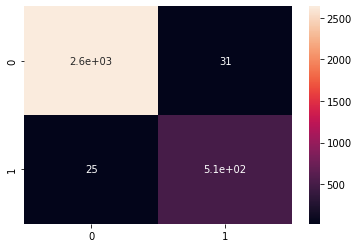

In [ ]:
sns.heatmap(confusion_matrix(y_test,np.round(preds)),annot=True)

Loss and accuracy Graph

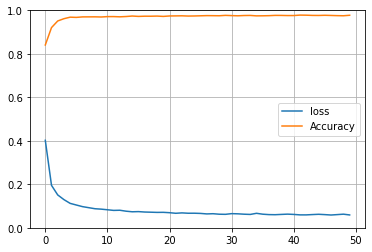

In [ ]:
pd.DataFrame(hist_2.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()